In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
impute_null_to_true_flag = False

In [4]:
df0 = pd.read_csv("(v3 - Ali review) Full picture data retrieval - Raw data.csv")

In [5]:
df0.head()

,Dev ID,AI Interview completed date,Country,Job role,Resume Skills,AI vetted skills,AI Soft Skills Result,AI Coding test result,AI Proctoring score,Human Interview passed,Gender
0,1057,01/06/23 12:09,Nigeria,NaN,NaN,Figma: 9/10 | Illustration: 9/10 | Animation: ...,09-Oct,NaN,100.0,True,Male
1,4492,01/08/23 4:03,Nigeria,NaN,NaN,ETL: 9/10 | Database: 3/10,09-Oct,NaN,NaN,True,Male
2,4547,01/08/23 19:38,Brazil (Brasil),NaN,NaN,WordPress: Expert | HTML/CSS: Mid-level | Lead...,Excellent,NaN,96.0,True,Male
3,4486,01/08/23 23:59,Brazil (Brasil),NaN,NaN,WordPress: Mid-level | HTML: Mid-level | CSS: ...,Good,NaN,NaN,True,Male
4,5952,01/09/23 6:41,NaN,NaN,NaN,React: Senior | NodeJs: Senior | Python: Mid-l...,Good,NaN,100.0,True,Male


In [6]:
CRITERIA = [
    (0, 2.5, "Not Experienced"),
    (2.5, 5, "Junior"),
    (5, 7.5, "Mid-Level"),
    (7.5, 10, "Senior")
]


def get_experience_level(score):
    """
    Determines the experience level based on a score using global CRITERIA.

    Args:
    - score (float): The numeric score of a skill.

    Returns:
    - str: The corresponding experience level.
    """
    for lower, upper, level in CRITERIA:
        if lower <= score < upper:
            return level.title()
    return "Invalid Score"

In [7]:
def skill_evaluation(input_string):
    """
    Converts skill scores to experience levels or assigns "Not experienced"
    for missing values based on context.

    Args:
    - input_string (str): A string containing skills and scores or experience levels.

    Returns:
    - str: A string with skills mapped to experience levels or the input unchanged.
    """
    result = []
    is_score_based = any("/" in skill for skill in input_string.split("|"))

    for skill_pair in input_string.split("|"):
        skill_pair = skill_pair.strip()

        if "Expert" in skill_pair:
            skill_pair = skill_pair.replace("Expert", "Senior")

        if "expert" in skill_pair:
            skill_pair = skill_pair.replace("expert", "Senior")

        if "EXPERT" in skill_pair:
            skill_pair = skill_pair.replace("EXPERT", "Senior")
        
        # Handle missing levels
        if ":" in skill_pair and skill_pair.split(":")[1].strip() == "":
            if is_score_based:
                experience = get_experience_level(0)  # Default to 0 score
            else:
                experience = "Not Experienced"
            result.append(f"{skill_pair.split(':')[0].strip()}: {experience}")
            continue
        
        # Check for existing experience levels
        if any(level.lower() in skill_pair.lower() for _, _, level in CRITERIA):
            result.append(skill_pair)
        else:
            # Process score-based input
            skill, score_str = skill_pair.split(":")
            score = float(score_str.split("/")[0]) if "/" in score_str else 0
            experience = get_experience_level(score)
            result.append(f"{skill.strip()}: {experience}")
    
    return " | ".join(result)

In [8]:
def safe_skill_evaluation(row):
    """
    Wraps skill_evaluation function to catch errors and log the Dev ID.

    Args:
    - row (pandas Series): A row from the DataFrame.

    Returns:
    - str: The result of skill_evaluation, or an error message.
    """
    try:
        return skill_evaluation(row["AI vetted skills"])
    except Exception as e:
        print(f"Error for Dev ID: {row['Dev ID']}. Error: {e}")
        return None  # Return None or a placeholder to handle the error gracefully

In [9]:
df0[~df0["AI vetted skills"].str.contains(":", na=False)]

,Dev ID,AI Interview completed date,Country,Job role,Resume Skills,AI vetted skills,AI Soft Skills Result,AI Coding test result,AI Proctoring score,Human Interview passed,Gender
429,63755,02/11/24 14:00,India,Supply Chain Specialist,"Product Lifecycle Knowledge, Supply Chain Mana...","Product Lifecycle Knowledge, Supply Chain Mana...",Average,NaN,3.0,NaN,Male


In [10]:
df1 = df0[df0["AI vetted skills"].str.contains(":", na=False)]

In [11]:
df0.shape, df1.shape

((5108, 11), (5107, 11))

In [12]:
total_length = len(df1)
if impute_null_to_true_flag:
    print(f"Total Records Count : {total_length}")
    true_count_before_impute = df1[df1["Human Interview passed"] == True].shape[0]
    false_count_before_impute = df1[df1["Human Interview passed"] == False].shape[0]
    null_count_before_impute = df1["Human Interview passed"].isnull().sum()

    print(f"Trues Count before imputation : {true_count_before_impute}")
    print(f"Falses Count before imputation : {false_count_before_impute}")
    print(f"Nulls Count before imputation : {null_count_before_impute}")    

    impute_count = int(null_count_before_impute * 0.15)
    null_rows = df1[df1['Human Interview passed'].isnull()]
    random_rows_to_impute = null_rows.sample(n=impute_count, random_state=42)
    
    df1.loc[random_rows_to_impute.index, 'Human Interview passed'] = True
    
    true_count_after_impute = df1[df1["Human Interview passed"] == True].shape[0]
    false_count_after_impute = df1[df1["Human Interview passed"] == False].shape[0]
    null_count_after_impute = df1["Human Interview passed"].isnull().sum()

    print(f"Trues Count after imputation : {true_count_after_impute}")
    print(f"Falses Count after imputation : {false_count_after_impute}")
    print(f"Nulls Count after imputation : {null_count_after_impute}")    
        

In [13]:
# df1["AI vetted skills cleansed"] = df1["AI vetted skills"].apply(skill_evaluation)
# df1["AI vetted skills cleansed"] = df1.apply(safe_skill_evaluation, axis=1)

In [14]:
df1["AI vetted skills cleansed"] = df1.apply(safe_skill_evaluation, axis=1)

In [15]:
df1.head()

,Dev ID,AI Interview completed date,Country,Job role,Resume Skills,AI vetted skills,AI Soft Skills Result,AI Coding test result,AI Proctoring score,Human Interview passed,Gender,AI vetted skills cleansed
0,1057,01/06/23 12:09,Nigeria,NaN,NaN,Figma: 9/10 | Illustration: 9/10 | Animation: ...,09-Oct,NaN,100.0,True,Male,Figma: Senior | Illustration: Senior | Animati...
1,4492,01/08/23 4:03,Nigeria,NaN,NaN,ETL: 9/10 | Database: 3/10,09-Oct,NaN,NaN,True,Male,ETL: Senior | Database: Junior
2,4547,01/08/23 19:38,Brazil (Brasil),NaN,NaN,WordPress: Expert | HTML/CSS: Mid-level | Lead...,Excellent,NaN,96.0,True,Male,WordPress: Senior | HTML/CSS: Mid-level | Lead...
3,4486,01/08/23 23:59,Brazil (Brasil),NaN,NaN,WordPress: Mid-level | HTML: Mid-level | CSS: ...,Good,NaN,NaN,True,Male,WordPress: Mid-level | HTML: Mid-level | CSS: ...
4,5952,01/09/23 6:41,NaN,NaN,NaN,React: Senior | NodeJs: Senior | Python: Mid-l...,Good,NaN,100.0,True,Male,React: Senior | NodeJs: Senior | Python: Mid-l...


In [16]:
df1["AI Vetted Not Experienced"] = df1["AI vetted skills cleansed"].apply(
    lambda x: "not experienced" in x.lower() if pd.notna(x) else False
)

In [17]:
df1["AI Soft Skills Result"].value_counts()

Average            1961
Good               1953
Below Average       543
Excellent           289
Not Experienced     125
Below average        82
08-Oct               28
09-Oct               10
07-Oct                7
06-Oct                6
04-Oct                4
03-Oct                3
05-Oct                2
Above Average         1
Name: AI Soft Skills Result, dtype: int64

In [18]:
df1["Gender"] = df1["Gender"].apply(lambda x: x.title() if pd.notna(x) else x)
df1.head()

,Dev ID,AI Interview completed date,Country,Job role,Resume Skills,AI vetted skills,AI Soft Skills Result,AI Coding test result,AI Proctoring score,Human Interview passed,Gender,AI vetted skills cleansed,AI Vetted Not Experienced
0,1057,01/06/23 12:09,Nigeria,NaN,NaN,Figma: 9/10 | Illustration: 9/10 | Animation: ...,09-Oct,NaN,100.0,True,Male,Figma: Senior | Illustration: Senior | Animati...,False
1,4492,01/08/23 4:03,Nigeria,NaN,NaN,ETL: 9/10 | Database: 3/10,09-Oct,NaN,NaN,True,Male,ETL: Senior | Database: Junior,False
2,4547,01/08/23 19:38,Brazil (Brasil),NaN,NaN,WordPress: Expert | HTML/CSS: Mid-level | Lead...,Excellent,NaN,96.0,True,Male,WordPress: Senior | HTML/CSS: Mid-level | Lead...,False
3,4486,01/08/23 23:59,Brazil (Brasil),NaN,NaN,WordPress: Mid-level | HTML: Mid-level | CSS: ...,Good,NaN,NaN,True,Male,WordPress: Mid-level | HTML: Mid-level | CSS: ...,False
4,5952,01/09/23 6:41,NaN,NaN,NaN,React: Senior | NodeJs: Senior | Python: Mid-l...,Good,NaN,100.0,True,Male,React: Senior | NodeJs: Senior | Python: Mid-l...,False


In [19]:
def safe_evaluate_soft_skills(row):
    """
    Safely evaluates the soft skills score for a given row and maps it to a category.
    Handles case sensitivity, capitalizes values, replaces "Above Average" with "Good",
    and returns NaN for missing values. Logs any errors along with the corresponding Dev ID.

    Args:
    - row (pandas Series): A row from the DataFrame containing 'AI Soft Skills Result' and other columns.

    Returns:
    - str or NaN: The mapped category ('Not Experienced', 'Below Average', etc.) or the capitalized value,
                  or NaN if the input is missing.
    """
    try:
        value = row["AI Soft Skills Result"]

        # Check for NaN or missing values
        if pd.isna(value):
            return pd.NA  # Return NaN for missing values

        # Handle values containing "Oct" in the date-like format (e.g., "09-Oct")
        if "Oct" in str(value):
            value = value.replace("Oct", "10")  # Replace 'Oct' with '10'
            score = int(value.split("-")[0].strip())  # Extract the numeric part before "-"
        elif "/" in str(value):
            # Extract the numeric score before "/" if it exists
            score = int(str(value).split("/")[0].strip())
        else:
            # If "Oct" or "/" is not present, handle as categorical value
            value = value.strip().title()  # Capitalize the value
            if value.lower() == "above average":
                return "Good"
            return value  # Return the capitalized value as is

        # Map the score to categories
        if score == 0:
            return "Not Experienced"
        elif 0 < score <= 4:
            return "Below Average"
        elif 4 < score <= 6:
            return "Average"
        elif 6 < score <= 8:
            return "Good"
        elif 8 < score <= 10:
            return "Excellent"
        else:
            return "Invalid Score"

    except Exception as e:
        # Log the problematic Dev ID and the error
        print(f"Error for Dev ID: {row['Dev ID']}. Value: {row['AI Soft Skills Result']}. Error: {e}")
        return pd.NA  # Return NaN for unhandled cases


In [20]:
df1["AI Soft Skills Result cleansed"] = df1.apply(safe_evaluate_soft_skills, axis=1)

In [21]:
df1.head()

,Dev ID,AI Interview completed date,Country,Job role,Resume Skills,AI vetted skills,AI Soft Skills Result,AI Coding test result,AI Proctoring score,Human Interview passed,Gender,AI vetted skills cleansed,AI Vetted Not Experienced,AI Soft Skills Result cleansed
0,1057,01/06/23 12:09,Nigeria,NaN,NaN,Figma: 9/10 | Illustration: 9/10 | Animation: ...,09-Oct,NaN,100.0,True,Male,Figma: Senior | Illustration: Senior | Animati...,False,Excellent
1,4492,01/08/23 4:03,Nigeria,NaN,NaN,ETL: 9/10 | Database: 3/10,09-Oct,NaN,NaN,True,Male,ETL: Senior | Database: Junior,False,Excellent
2,4547,01/08/23 19:38,Brazil (Brasil),NaN,NaN,WordPress: Expert | HTML/CSS: Mid-level | Lead...,Excellent,NaN,96.0,True,Male,WordPress: Senior | HTML/CSS: Mid-level | Lead...,False,Excellent
3,4486,01/08/23 23:59,Brazil (Brasil),NaN,NaN,WordPress: Mid-level | HTML: Mid-level | CSS: ...,Good,NaN,NaN,True,Male,WordPress: Mid-level | HTML: Mid-level | CSS: ...,False,Good
4,5952,01/09/23 6:41,NaN,NaN,NaN,React: Senior | NodeJs: Senior | Python: Mid-l...,Good,NaN,100.0,True,Male,React: Senior | NodeJs: Senior | Python: Mid-l...,False,Good


In [22]:
df1["AI Soft Skills Result cleansed"].value_counts()

Good               1989
Average            1969
Below Average       632
Excellent           299
Not Experienced     125
Name: AI Soft Skills Result cleansed, dtype: int64

In [23]:
df1["AI Proctoring score"].value_counts()

100.0    1005
99.0      484
98.0      326
97.0      230
96.0      167
         ... 
46.0        1
34.0        1
12.0        1
42.0        1
48.0        1
Name: AI Proctoring score, Length: 98, dtype: int64

In [24]:
df1["AI Coding test result cleansed"] = df1["AI Coding test result"].apply(lambda x: x.title() if pd.notna(x) else x)

In [25]:
df1["AI Coding test result cleansed"].value_counts()

Mid-Level          1210
Not Experienced    1020
Senior              836
Junior              836
Name: AI Coding test result cleansed, dtype: int64

In [26]:
df1.head()

,Dev ID,AI Interview completed date,Country,Job role,Resume Skills,AI vetted skills,AI Soft Skills Result,AI Coding test result,AI Proctoring score,Human Interview passed,Gender,AI vetted skills cleansed,AI Vetted Not Experienced,AI Soft Skills Result cleansed,AI Coding test result cleansed
0,1057,01/06/23 12:09,Nigeria,NaN,NaN,Figma: 9/10 | Illustration: 9/10 | Animation: ...,09-Oct,NaN,100.0,True,Male,Figma: Senior | Illustration: Senior | Animati...,False,Excellent,NaN
1,4492,01/08/23 4:03,Nigeria,NaN,NaN,ETL: 9/10 | Database: 3/10,09-Oct,NaN,NaN,True,Male,ETL: Senior | Database: Junior,False,Excellent,NaN
2,4547,01/08/23 19:38,Brazil (Brasil),NaN,NaN,WordPress: Expert | HTML/CSS: Mid-level | Lead...,Excellent,NaN,96.0,True,Male,WordPress: Senior | HTML/CSS: Mid-level | Lead...,False,Excellent,NaN
3,4486,01/08/23 23:59,Brazil (Brasil),NaN,NaN,WordPress: Mid-level | HTML: Mid-level | CSS: ...,Good,NaN,NaN,True,Male,WordPress: Mid-level | HTML: Mid-level | CSS: ...,False,Good,NaN
4,5952,01/09/23 6:41,NaN,NaN,NaN,React: Senior | NodeJs: Senior | Python: Mid-l...,Good,NaN,100.0,True,Male,React: Senior | NodeJs: Senior | Python: Mid-l...,False,Good,NaN


In [27]:
def is_exceptional_candidate(row):
    """
    Checks if a candidate is exceptional based on:
    - All skills being Senior
    - Soft skills being Excellent
    - Coding being Senior, or NULL
    """
    try:
        # Check skills for "Senior"
        skills_cleansed = row["AI vetted skills cleansed"]
        if pd.notna(skills_cleansed):
            skills_valid = all(
                # Ensure ':' exists before splitting
                skill.split(":")[1].strip().lower() in ["senior"]
                for skill in skills_cleansed.split("|") if ":" in skill
            )
        else:
            skills_valid = False

        # Check soft skills for "Excellent"
        soft_skills_cleansed = row["AI Soft Skills Result cleansed"]
        soft_skills_valid = (
            soft_skills_cleansed.strip().lower() == "excellent"
            if pd.notna(soft_skills_cleansed)
            else False
        )

        # Check coding for "Senior", or NULL
        coding_cleansed = row["AI Coding test result cleansed"]
        coding_valid = (
            pd.isna(coding_cleansed)
            or coding_cleansed.strip().lower() in ["senior"]
        )

        # Combine all criteria
        return skills_valid and soft_skills_valid and coding_valid

    except Exception as e:
        # Print Dev ID and the error
        print(f"Error for Dev ID: {row['Dev ID']}. Error: {e}")
        return False

In [28]:
df1["Exceptional Candidate"] = df1.apply(is_exceptional_candidate, axis=1)
df1.head()

,Dev ID,AI Interview completed date,Country,Job role,Resume Skills,AI vetted skills,AI Soft Skills Result,AI Coding test result,AI Proctoring score,Human Interview passed,Gender,AI vetted skills cleansed,AI Vetted Not Experienced,AI Soft Skills Result cleansed,AI Coding test result cleansed,Exceptional Candidate
0,1057,01/06/23 12:09,Nigeria,NaN,NaN,Figma: 9/10 | Illustration: 9/10 | Animation: ...,09-Oct,NaN,100.0,True,Male,Figma: Senior | Illustration: Senior | Animati...,False,Excellent,NaN,True
1,4492,01/08/23 4:03,Nigeria,NaN,NaN,ETL: 9/10 | Database: 3/10,09-Oct,NaN,NaN,True,Male,ETL: Senior | Database: Junior,False,Excellent,NaN,False
2,4547,01/08/23 19:38,Brazil (Brasil),NaN,NaN,WordPress: Expert | HTML/CSS: Mid-level | Lead...,Excellent,NaN,96.0,True,Male,WordPress: Senior | HTML/CSS: Mid-level | Lead...,False,Excellent,NaN,False
3,4486,01/08/23 23:59,Brazil (Brasil),NaN,NaN,WordPress: Mid-level | HTML: Mid-level | CSS: ...,Good,NaN,NaN,True,Male,WordPress: Mid-level | HTML: Mid-level | CSS: ...,False,Good,NaN,False
4,5952,01/09/23 6:41,NaN,NaN,NaN,React: Senior | NodeJs: Senior | Python: Mid-l...,Good,NaN,100.0,True,Male,React: Senior | NodeJs: Senior | Python: Mid-l...,False,Good,NaN,False


In [29]:
# df1["Exceptional Candidate"] = df1.apply(is_exceptional_candidate, axis=1)
# df1.head()


In [30]:
df1[df1["Dev ID"].isin([66125, 61739])]

,Dev ID,AI Interview completed date,Country,Job role,Resume Skills,AI vetted skills,AI Soft Skills Result,AI Coding test result,AI Proctoring score,Human Interview passed,Gender,AI vetted skills cleansed,AI Vetted Not Experienced,AI Soft Skills Result cleansed,AI Coding test result cleansed,Exceptional Candidate
1735,66125,08/11/24 12:20,India,Mobile Application Developer,"React.js, React Native, TypeScript, JavaScript...",Not experienced | Android Development: Junior ...,Good,Senior,81.0,NaN,Male,Not experienced | Android Development: Junior ...,True,Good,Senior,False
4224,61739,25/10/24 9:48,India,Senior Software Engineer (Angular),"HTML5, CSS3, jQuery, JavaScript, Angular 12, A...",Not experienced | Angular: Junior | Firebase: ...,Below Average,Not Experienced,87.0,NaN,Male,Not experienced | Angular: Junior | Firebase: ...,True,Below Average,Not Experienced,False


In [31]:
df1 = df1[~df1["Dev ID"].isin([66125, 61739, 63755])]

In [32]:
def evaluate_global_pass(row):
    """
    Evaluates whether a candidate meets the global passing criteria.

    Passing Criteria:
    - Skills ("AI vetted skills cleansed"): Minimum 2 skills at Mid-level+ (Mid-level, Senior).
    - Soft Skills ("AI Soft Skills Result cleansed"): Good+ (Good, Excellent).
    - Coding ("AI Coding test result cleansed"): Mid-level+ or Null.
    - Proctoring Score ("AI Proctoring score"): 70%+ or Null.

    Args:
    - row (pandas Series): A row from the DataFrame containing relevant columns.

    Returns:
    - bool: True if the candidate meets all criteria, otherwise False.
    """
    try:
        # Extract column values
        skills = row.get("AI vetted skills cleansed", "")
        soft_skills = row.get("AI Soft Skills Result cleansed", "")
        coding = row.get("AI Coding test result cleansed", None)
        proctoring_score = row.get("AI Proctoring score", None)
        
        # Define levels (all in lowercase)
        mid_level_plus = {"mid-level", "senior"}
        good_plus = {"good", "excellent"}
        
        # Handle NaN or missing values
        if pd.isna(skills):
            skills = ""
        if pd.isna(soft_skills):
            soft_skills = ""
        if pd.isna(coding):
            coding = None
        
        # Evaluate skills: Extract skill levels and check for at least 2 at Mid-level+
        skill_levels = [part.split(":")[1].strip().lower() for part in skills.split("|") if ":" in part]
        skill_count = sum(level in mid_level_plus for level in skill_levels)
        if skill_count < 2:
            return False
        
        # Evaluate soft skills: Good+
        if soft_skills.lower() not in good_plus:
            return False
        
        # Evaluate coding: Mid-level+ or Null
        if coding and coding.strip().lower() not in mid_level_plus:
            return False
        
        # Evaluate proctoring score: 70%+ or Null
        if proctoring_score and (not isinstance(proctoring_score, (int, float)) or proctoring_score < 70):
            return False
        
        return True
    
    except Exception as e:
        print(f"Error processing row: {row}. Error: {e}")
        return False


In [33]:
df1["Global Pass"] = df1.apply(evaluate_global_pass, axis=1)

In [34]:
df1.head()

,Dev ID,AI Interview completed date,Country,Job role,Resume Skills,AI vetted skills,AI Soft Skills Result,AI Coding test result,AI Proctoring score,Human Interview passed,Gender,AI vetted skills cleansed,AI Vetted Not Experienced,AI Soft Skills Result cleansed,AI Coding test result cleansed,Exceptional Candidate,Global Pass
0,1057,01/06/23 12:09,Nigeria,NaN,NaN,Figma: 9/10 | Illustration: 9/10 | Animation: ...,09-Oct,NaN,100.0,True,Male,Figma: Senior | Illustration: Senior | Animati...,False,Excellent,NaN,True,True
1,4492,01/08/23 4:03,Nigeria,NaN,NaN,ETL: 9/10 | Database: 3/10,09-Oct,NaN,NaN,True,Male,ETL: Senior | Database: Junior,False,Excellent,NaN,False,False
2,4547,01/08/23 19:38,Brazil (Brasil),NaN,NaN,WordPress: Expert | HTML/CSS: Mid-level | Lead...,Excellent,NaN,96.0,True,Male,WordPress: Senior | HTML/CSS: Mid-level | Lead...,False,Excellent,NaN,False,True
3,4486,01/08/23 23:59,Brazil (Brasil),NaN,NaN,WordPress: Mid-level | HTML: Mid-level | CSS: ...,Good,NaN,NaN,True,Male,WordPress: Mid-level | HTML: Mid-level | CSS: ...,False,Good,NaN,False,True
4,5952,01/09/23 6:41,NaN,NaN,NaN,React: Senior | NodeJs: Senior | Python: Mid-l...,Good,NaN,100.0,True,Male,React: Senior | NodeJs: Senior | Python: Mid-l...,False,Good,NaN,False,True


In [35]:
def evaluate_very_bad_ai(row):
    """
    Evaluates whether a candidate performed very badly on the AI interview.

    Criteria for Very Badly:
    - Skills ("AI vetted skills cleansed"): All skills must be Not Experienced or Junior.
    - Soft Skills ("AI Soft Skills Result cleansed"): Average or Below Average.
    - Coding ("AI Coding test result cleansed"): Junior, Not Experienced, or Null.

    Args:
    - row (pandas Series): A row from the DataFrame containing relevant columns.

    Returns:
    - bool: True if the candidate meets all criteria for "very bad", otherwise False.
    """
    try:
        # Extract column values
        skills = row.get("AI vetted skills cleansed", "")
        soft_skills = row.get("AI Soft Skills Result cleansed", "")
        coding = row.get("AI Coding test result cleansed", None)
        
        # Define levels
        very_bad_skills = {"not experienced", "junior"}
        very_bad_soft_skills = {"average", "below average"}
        very_bad_coding = {"junior", "not experienced"}
        
        # Handle NaN or missing values
        if pd.isna(skills):
            skills = ""
        if pd.isna(soft_skills):
            soft_skills = ""
        if pd.isna(coding):
            coding = None
        
        # Evaluate skills: All skills must be Not Experienced or Junior
        skill_levels = [part.split(":")[1].strip().lower() for part in skills.split("|") if ":" in part]
        if any(level not in very_bad_skills for level in skill_levels):
            return False
        
        # Evaluate soft skills: Average or Below Average
        if soft_skills.lower() not in very_bad_soft_skills:
            return False
        
        # Evaluate coding: Junior, Not Experienced, or Null
        if coding and coding.strip().lower() not in very_bad_coding:
            return False
        
        return True
    
    except Exception as e:
        print(f"Error processing row: {row}. Error: {e}")
        return False

In [36]:
df1["Bad AI"] = df1.apply(evaluate_very_bad_ai, axis=1)

In [37]:
df1[df1["Bad AI"] == True].shape[0]

982

In [38]:
df1["Human Interview passed"].value_counts()

True     1327
False      44
Name: Human Interview passed, dtype: int64

In [39]:
# Total candidates (number of rows in the DataFrame)
total_candidates = len(df1)

gender_filtered = df1["Gender"].apply(lambda x: x.lower() != "not determined")
global_passed_data = df1[df1["Global Pass"] == True]
global_failed_data = df1[df1["Global Pass"] == False]

# Create a dictionary to store the summary data
summary_data = {
    "Description": [
        "Total Candidates", 
        "Total with Human Interview Data", 
        "Total with Country Data", 
        "Gender Inferred", 
        "Total with Resume Skills Data", 
        "Total with AI Vetted Skills Data", 
        "Soft Skills Result Data", 
        "Coding Test Result Data", 
        "Proctoring Score Data",
        "Global Passed Data",
        "Global Failed Data",
        
    ],
    "Count": [
        total_candidates, 
        df1["Human Interview passed"].notnull().sum(), 
        df1["Country"].notnull().sum(), 
        gender_filtered.sum(), 
        df1["Resume Skills"].notnull().sum(), 
        df1["AI vetted skills cleansed"].notnull().sum(), 
        df1["AI Soft Skills Result cleansed"].notnull().sum(), 
        df1["AI Coding test result cleansed"].notnull().sum(), 
        df1["AI Proctoring score"].notnull().sum(),
        global_passed_data.shape[0],
        global_failed_data.shape[0],
    ]
}

# Create a DataFrame from the summary data
df_summary = pd.DataFrame(summary_data)

# Calculate percentages
df_summary["Percentage"] = df_summary["Count"] / total_candidates * 100

# Format the data (add commas to count and round percentage to 2 decimals)
df_summary["Count"] = df_summary["Count"].apply(lambda x: f"{x:,}")
df_summary["Percentage"] = df_summary["Percentage"].apply(lambda x: f"{x:.2f}%")

# Add a new column for the summary
df_summary["Summary"] = df_summary["Count"] + " (" + df_summary["Percentage"] + ")"

# Display the final summary DataFrame
print(df_summary[["Description", "Summary"]])

                         Description          Summary
0                   Total Candidates  5,105 (100.00%)
1    Total with Human Interview Data   1,371 (26.86%)
2            Total with Country Data   4,131 (80.92%)
3                    Gender Inferred   4,831 (94.63%)
4      Total with Resume Skills Data   1,860 (36.43%)
5   Total with AI Vetted Skills Data  5,105 (100.00%)
6            Soft Skills Result Data   5,012 (98.18%)
7            Coding Test Result Data   3,900 (76.40%)
8              Proctoring Score Data   4,325 (84.72%)
9                 Global Passed Data     996 (19.51%)
10                Global Failed Data   4,109 (80.49%)


### For those who passed the AI Interview (true/false column based on global passing criteria), what % passed the human interview? 

In [40]:
total_ai_passed = df1[df1["Global Pass"] == True].shape[0]
total_human_passed = df1[df1["Human Interview passed"] == True].shape[0]
ai_and_human_passed = df1[(df1["Global Pass"] == True) & (df1["Human Interview passed"] == True)].shape[0]
percentage_passed = (ai_and_human_passed / total_ai_passed) * 100 if total_ai_passed > 0 else 0
print(f'Total AI Passed : {total_ai_passed}')
print(f'Total AI and Human Passed : {ai_and_human_passed}')
print(f"Percentage of candidates who passed both AI and Human Interviews {(ai_and_human_passed / total_ai_passed)}: {percentage_passed:.2f}%")

Total AI Passed : 996
Total AI and Human Passed : 521
Percentage of candidates who passed both AI and Human Interviews 0.5230923694779116: 52.31%


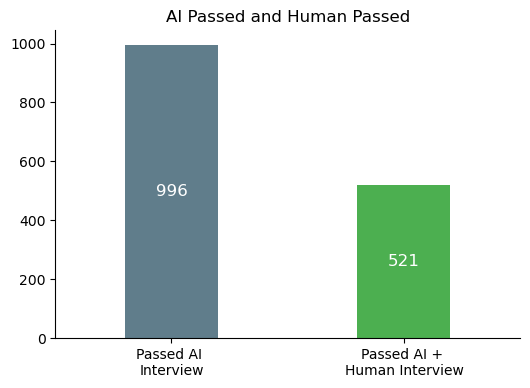

In [41]:
# Prepare data for the bar plot
categories = ['Passed AI \nInterview', 'Passed AI + \nHuman Interview']
values = [total_ai_passed, ai_and_human_passed]

# Create the bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, values, width=0.4, color=['#607D8B', '#4CAF50'])  # Reduce bar width

for bar in bars:
    yval = bar.get_height()
    # Position the text inside the bars
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, str(int(yval)), ha='center', va='center', color='white', fontsize=12)

plt.xticks(ticks=range(len(categories)), labels=categories)
plt.gca().set_xlim(-0.5, len(categories) - 0.5)
# plt.xlim(-0.25, len(categories) - 0.75)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# plt.xlabel('Categories')
# plt.ylabel('Number of Candidates')
plt.title('AI Passed and Human Passed')
plt.show()

### For those who did very badly on the AI Interview (not experienced or junior in all skills, average or below soft skills, and junior or below in coding exercise (or NULL), what % passed the human interview? 

In [42]:
# total_ai_failed = df1[df1["Global Pass"] == False].shape[0]
# total_human_passed = df1[df1["Human Interview passed"] == True].shape[0]
# ai_failed_human_passed = df1[(df1["Global Pass"] == False) & (df1["Human Interview passed"] == True)].shape[0]
# percentage_passed = (ai_failed_human_passed / total_ai_failed) * 100 if total_ai_failed > 0 else 0

# print(f'Total AI Failed : {total_ai_failed}')
# print(f'Total AI Failed and Human Passed : {ai_failed_human_passed}')

# print(f"Percentage of candidates who passed both AI and Human Interviews {(ai_failed_human_passed / total_ai_failed)}: {percentage_passed:.2f}%")

total_bad_ai = df1[df1["Bad AI"] == True].shape[0]
bad_ai_human_passed = df1[(df1["Bad AI"] == True) & (df1["Human Interview passed"] == True)].shape[0]
percentage_passed = (bad_ai_human_passed / total_bad_ai) * 100 if total_bad_ai > 0 else 0
print(f"Total candidates with 'Bad AI': {total_bad_ai}")
print(f"Total candidates with 'Bad AI' and Human Passed: {bad_ai_human_passed}")
print(f"Percentage of 'Bad AI' candidates who passed Human Interview: {percentage_passed:.2f}%")


Total candidates with 'Bad AI': 982
Total candidates with 'Bad AI' and Human Passed: 42
Percentage of 'Bad AI' candidates who passed Human Interview: 4.28%


In [43]:
# total_bad_ai = df1[(df1["Bad AI"] == True) & (df1["Human Interview passed"].isin([True, False]))].shape[0]
# bad_ai_human_passed = df1[(df1["Bad AI"] == True) & (df1["Human Interview passed"] == True)].shape[0]
# percentage_passed = (bad_ai_human_passed / total_bad_ai) * 100 if total_bad_ai > 0 else 0
# print(f"Total candidates with 'Bad AI': {total_bad_ai}")
# print(f"Total candidates with 'Bad AI' and Human Passed: {bad_ai_human_passed}")
# print(f"Percentage of 'Bad AI' candidates who passed Human Interview: {percentage_passed:.2f}%")


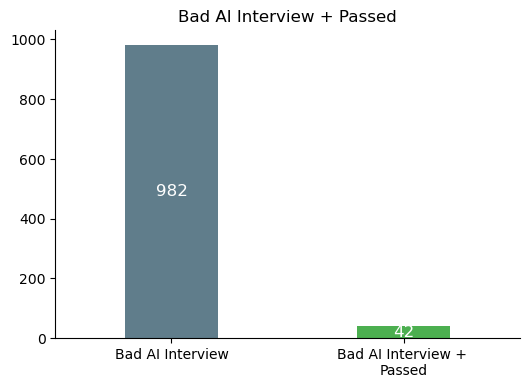

In [44]:
# Prepare data for the bar plot
categories = ['Bad AI Interview', 'Bad AI Interview + \nPassed']
values = [total_bad_ai, bad_ai_human_passed]

# Create the bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, values, width=0.4, color=['#607D8B', '#4CAF50'])  # Reduce bar width

for bar in bars:
    yval = bar.get_height()
    # Position the text inside the bars
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, str(int(yval)), ha='center', va='center', color='white', fontsize=12)

plt.xticks(ticks=range(len(categories)), labels=categories)
plt.gca().set_xlim(-0.5, len(categories) - 0.5)
# plt.xlim(-0.25, len(categories) - 0.75)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# plt.xlabel('Categories')
# plt.ylabel('Number of Candidates')
plt.title('Bad AI Interview + Passed')
plt.show()

In [45]:
df1[(df1["Human Interview passed"] == True)].shape[0]

1327

In [46]:
df1["AI Vetted Not Experienced"].value_counts()

False    3957
True     1148
Name: AI Vetted Not Experienced, dtype: int64

### For those who got not experienced in 1 skill or more, what % passed the human interview? 

In [47]:
total_not_experienced = df1[df1["AI Vetted Not Experienced"] == True].shape[0]
not_experienced_human_passed = df1[
    (df1["AI Vetted Not Experienced"] == True) & (df1["Human Interview passed"] == True)
].shape[0]
percentage_passed = (not_experienced_human_passed / total_not_experienced) * 100 if total_not_experienced > 0 else 0

# Output the results
print(f"Total 'Not Experienced' candidates: {total_not_experienced}")
print(f"Candidates who passed the Human Interview: {not_experienced_human_passed}")
print(f"Percentage passed the Human Interview: {percentage_passed:.2f}%")


Total 'Not Experienced' candidates: 1148
Candidates who passed the Human Interview: 84
Percentage passed the Human Interview: 7.32%


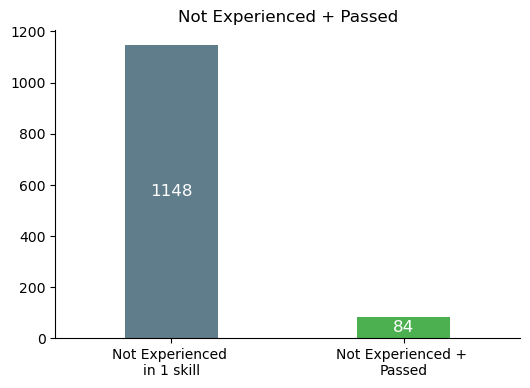

In [48]:
# Prepare data for the bar plot
categories = ['Not Experienced \nin 1 skill', 'Not Experienced + \nPassed']
values = [total_not_experienced, not_experienced_human_passed]

# Create the bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, values, width=0.4, color=['#607D8B', '#4CAF50'])  # Reduce bar width

for bar in bars:
    yval = bar.get_height()
    # Position the text inside the bars
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, str(int(yval)), ha='center', va='center', color='white', fontsize=12)

plt.xticks(ticks=range(len(categories)), labels=categories)
plt.gca().set_xlim(-0.5, len(categories) - 0.5)
# plt.xlim(-0.25, len(categories) - 0.75)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# plt.xlabel('Categories')
# plt.ylabel('Number of Candidates')
plt.title('Not Experienced + Passed')
plt.show()

### For those who did exceptional in AI Interview (senior in all skills, excellent in soft skills, and senior or NULL in coding exercise), what % passed the human interview? 

In [49]:
total_exceptional = df1[df1["Exceptional Candidate"] == True].shape[0]
exceptional_human_passed = df1[
    (df1["Exceptional Candidate"] == True) & (df1["Human Interview passed"] == True)
].shape[0]
percentage_passed = (exceptional_human_passed / total_exceptional) * 100 if total_exceptional > 0 else 0
print(f"Total Exceptional Candidates: {total_exceptional}")
print(f"Exceptional Candidates who passed the Human Interview: {exceptional_human_passed}")
print(f"Percentage of Exceptional Candidates who passed the Human Interview: {percentage_passed:.2f}%")


Total Exceptional Candidates: 14
Exceptional Candidates who passed the Human Interview: 10
Percentage of Exceptional Candidates who passed the Human Interview: 71.43%


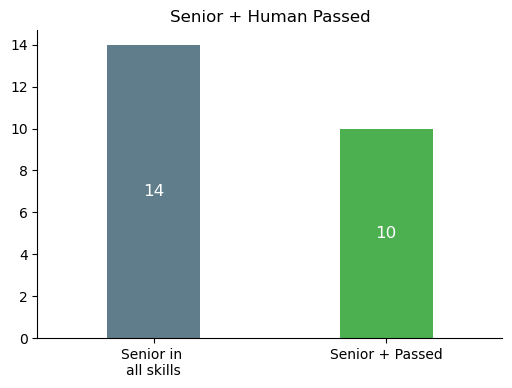

In [50]:
# Prepare data for the bar plot
categories = ['Senior in \nall skills', 'Senior + Passed']
values = [total_exceptional, exceptional_human_passed]

# Create the bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, values, width=0.4, color=['#607D8B', '#4CAF50'])  # Reduce bar width

for bar in bars:
    yval = bar.get_height()
    # Position the text inside the bars
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, str(int(yval)), ha='center', va='center', color='white', fontsize=12)

plt.xticks(ticks=range(len(categories)), labels=categories)
plt.gca().set_xlim(-0.5, len(categories) - 0.5)
# plt.xlim(-0.25, len(categories) - 0.75)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# plt.xlabel('Categories')
# plt.ylabel('Number of Candidates')
plt.title('Senior + Human Passed')
plt.show()

### For those who passed TECHNICAL AI Interview, according to global passing criteria, what % are women (show in comparison to women in tech globally with source shown)

In [51]:
# technical_ai_passed_women = df1[
#     (
#         df1["AI Coding test result cleansed"].isnull() |  # Include NULLs
#         df1["AI Coding test result cleansed"].str.lower().isin(["mid-level", "senior"])  # Mid-level or higher
#     ) &
#     (df1["Gender"].str.lower() == "female")
# ]
global_pass = df1[
    (df1["Global Pass"] == True)  # Global pass criteria
]
global_pass_and_women = global_pass[
    global_pass["Gender"].str.lower() == "female"
]
global_pass = global_pass.shape[0]
global_pass_and_women = global_pass_and_women.shape[0]
percentage_passed = (global_pass_and_women / global_pass) * 100 if global_pass_and_women > 0 else 0

print(f"Total who passed Technical AI Interview: {global_pass}")
print(f"Total women who passed both Technical AI: {global_pass_and_women}")
print(f"Percentage of Women Candidates who passed the Technical AI: {percentage_passed:.2f}%")

Total who passed Technical AI Interview: 996
Total women who passed both Technical AI: 185
Percentage of Women Candidates who passed the Technical AI: 18.57%


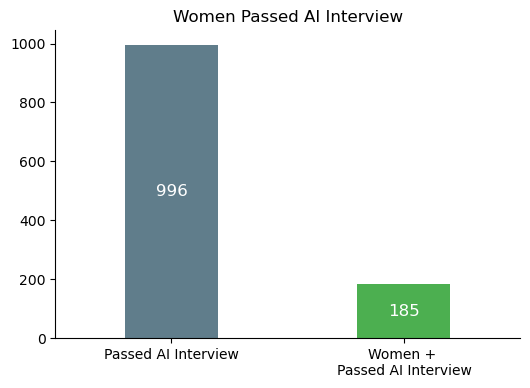

In [52]:
# Prepare data for the bar plot
categories = ['Passed AI Interview', 'Women + \nPassed AI Interview']
values = [global_pass, global_pass_and_women]

# Create the bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, values, width=0.4, color=['#607D8B', '#4CAF50'])  # Reduce bar width

for bar in bars:
    yval = bar.get_height()
    # Position the text inside the bars
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, str(int(yval)), ha='center', va='center', color='white', fontsize=12)

plt.xticks(ticks=range(len(categories)), labels=categories)
plt.gca().set_xlim(-0.5, len(categories) - 0.5)
# plt.xlim(-0.25, len(categories) - 0.75)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# plt.xlabel('Categories')
# plt.ylabel('Number of Candidates')
plt.title('Women Passed AI Interview')
plt.show()

### What is Simpon’s diversity index of those who passed AI Interview (global passing criteria)?

In [53]:
# def calculate_simpsons_index(data, column):
#     """
#     Calculates Simpson's Diversity Index for a given categorical column.

#     Args:
#     - data (pd.DataFrame): DataFrame containing the data.
#     - column (str): Column name to calculate diversity on.

#     Returns:
#     - float: Simpson's Diversity Index.
#     """
#     # Count occurrences of each category
#     category_counts = data[column].value_counts()
#     print(category_counts)
    
#     # Total count
#     total = category_counts.sum()
    
#     # Calculate Simpson's Diversity Index
#     diversity_index = 1 - sum((count / total) ** 2 for count in category_counts)
    
#     return diversity_index
def calculate_simpsons_index(data, column):
    # Count the occurrences of each category in the column
    counts = data[column].value_counts()
    N = len(data)  # Total number of individuals
    # Calculate the Simpson's index formula
    index = 1 - sum((count * (count - 1)) / (N * (N - 1)) for count in counts)
    return index

In [54]:
ai_passed = df1[df1["Global Pass"] == True]
diversity_column = "Gender"  # Replace with the actual column name
simpsons_index = calculate_simpsons_index(ai_passed, diversity_column)
print(f"Simpson's Diversity Index for AI-Passed Candidates ({diversity_column}): {simpsons_index:.4f}")

Simpson's Diversity Index for AI-Passed Candidates (Gender): 0.3709


### What is Simpon’s diversity index of those who passed human interview (just human, no need to meet True on AI interview column)

In [55]:
human_passed = df1[df1["Human Interview passed"] == True]
diversity_column = "Gender"
simpsons_index = calculate_simpsons_index(human_passed, diversity_column)
print(f"Simpson's Diversity Index for Human-Passed Candidates ({diversity_column}): {simpsons_index:.4f}")

Simpson's Diversity Index for Human-Passed Candidates (Gender): 0.3187


### What is Simpon’s diversity index of those who passed AI + human interview (this is according to global passing criteria AND human passed column being true, not just moving to human interview)

In [56]:
ai_and_human_passed = df1[(df1["Global Pass"] == True) & (df1["Human Interview passed"] == True)]
diversity_column = "Gender"
simpsons_index = calculate_simpsons_index(ai_and_human_passed, diversity_column)
print(f"Simpson's Diversity Index for AI + Human-Passed Candidates ({diversity_column}): {simpsons_index:.4f}")

Simpson's Diversity Index for AI + Human-Passed Candidates (Gender): 0.3350


In [57]:
dfout_1 = df0.fillna("Null")
dfout_2 = df1.fillna("Null")

with pd.ExcelWriter("(v3 - Pavan review) Full picture data retrieval - Raw data.xlsx", engine="xlsxwriter") as writer:
    dfout_1.to_excel(writer, sheet_name="Raw data", index=False)
    dfout_2.to_excel(writer, sheet_name="Raw data cleansed", index=False)
    df_summary.to_excel(writer, sheet_name="Raw data summary", index=False)


In [58]:
set(df0["Dev ID"].to_list()) - set(df1["Dev ID"].to_list())

{61739, 63755, 66125}

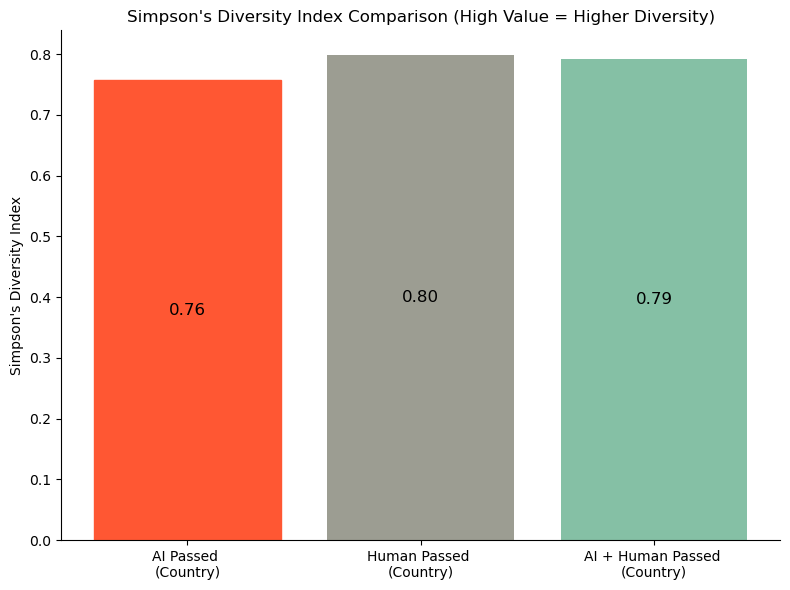

AI Passed 
(Country): 0.7564
Human Passed 
(Country): 0.7990
AI + Human Passed 
(Country): 0.7921


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate Simpson's Diversity Index for a given column
def simpsons_index_single_column(data, column):
    # Count the occurrences of each category in the column
    counts = data[column].value_counts()
    
    N = len(data)  # Total number of individuals
    # Calculate the Simpson's index formula
    index = 1 - sum((count * (count - 1)) / (N * (N - 1)) for count in counts)
    
    return index

# Filter the data based on the criteria
ai_passed = df1[df1["Global Pass"] == True]  # Those who passed AI Interview
human_passed = df1[df1["Human Interview passed"] == True]  # Those who passed Human Interview
ai_and_human_passed = df1[(df1["Global Pass"] == True) & (df1["Human Interview passed"] == True)]  # Those who passed both

# Calculate Simpson's Diversity Index for each group based on 'Gender', 'Country', and 'Job role' columns
# simpsons_ai_gender = simpsons_index_single_column(ai_passed, "Gender")
# simpsons_human_gender = simpsons_index_single_column(human_passed, "Gender")
# simpsons_ai_and_human_gender = simpsons_index_single_column(ai_and_human_passed, "Gender")

simpsons_ai_country = simpsons_index_single_column(ai_passed, "Country")
simpsons_human_country = simpsons_index_single_column(human_passed, "Country")
simpsons_ai_and_human_country = simpsons_index_single_column(ai_and_human_passed, "Country")

# simpsons_ai_job_role = simpsons_index_single_column(ai_passed, "Job role")
# simpsons_human_job_role = simpsons_index_single_column(human_passed, "Job role")
# simpsons_ai_and_human_job_role = simpsons_index_single_column(ai_and_human_passed, "Job role")

# Create a dictionary to hold the results for plotting (per group and per column)
simpsons_results = {
    # "AI Passed (Gender)": simpsons_ai_gender,
    # "Human Passed (Gender)": simpsons_human_gender,
    # "AI + Human Passed (Gender)": simpsons_ai_and_human_gender,
    "AI Passed \n(Country)": simpsons_ai_country,
    "Human Passed \n(Country)": simpsons_human_country,
    "AI + Human Passed \n(Country)": simpsons_ai_and_human_country,
    # "AI Passed (Job role)": simpsons_ai_job_role,
    # "Human Passed (Job role)": simpsons_human_job_role,
    # "AI + Human Passed (Job role)": simpsons_ai_and_human_job_role
}

# Define more muted colors for the bars
# colors = ['#8D8F91', '#6D9D3B', '#3C6E71', '#FF5733', '#9C9D92', '#85C0A5', '#D4C7A7', '#F1C7B6', '#F7B7A3']
colors = ['#FF5733', '#9C9D92', '#85C0A5']

# Plot the Simpson's Diversity Index comparison
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(simpsons_results.keys(), simpsons_results.values(), color=colors)

# Annotate each bar with the value
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', fontsize=12)

# Highlight the group with the lowest diversity (i.e., the highest value of Simpson's Diversity Index)
most_diverse_group = min(simpsons_results, key=simpsons_results.get)
highlight_bar = bars[list(simpsons_results.keys()).index(most_diverse_group)]
highlight_bar.set_color('#FF5733')  # Change the color of the most diverse group

# Add title and labels
ax.set_title("Simpson's Diversity Index Comparison (High Value = Higher Diversity)")
# ax.set_xlabel("Interview Categories (Country)")
ax.set_ylabel("Simpson's Diversity Index")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.xticks(rotation=00)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


# Print results
for category, index in simpsons_results.items():
    print(f"{category}: {index:.4f}")


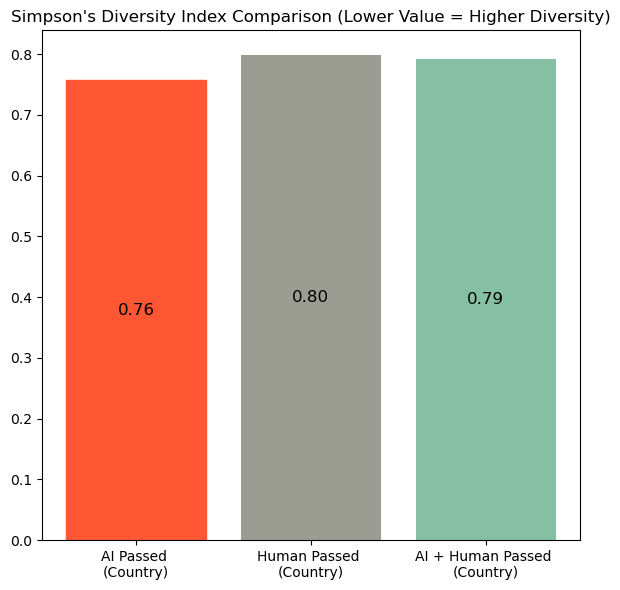

AI Passed 
(Country): 0.7564
Human Passed 
(Country): 0.7990
AI + Human Passed 
(Country): 0.7921


In [60]:
def simpsons_index_single_column(data, column):
    counts = data[column].value_counts()
    N = len(data)  # Total number of individuals
    index = 1 - sum((count * (count - 1)) / (N * (N - 1)) for count in counts)    
    return index


ai_passed = df1[df1["Global Pass"] == True]  # Those who passed AI Interview
human_passed = df1[df1["Human Interview passed"] == True]  # Those who passed Human Interview
ai_and_human_passed = df1[(df1["Global Pass"] == True) & (df1["Human Interview passed"] == True)]  # Those who passed both

simpsons_ai_country = simpsons_index_single_column(ai_passed, "Country")
simpsons_human_country = simpsons_index_single_column(human_passed, "Country")
simpsons_ai_and_human_country = simpsons_index_single_column(ai_and_human_passed, "Country")
simpsons_results = {
    "AI Passed \n(Country)": simpsons_ai_country,
    "Human Passed \n(Country)": simpsons_human_country,
    "AI + Human Passed \n(Country)": simpsons_ai_and_human_country,
}
colors = ['#FF5733', '#9C9D92', '#85C0A5']
fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(simpsons_results.keys(), simpsons_results.values(), color=colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', fontsize=12)
most_diverse_group = min(simpsons_results, key=simpsons_results.get)
highlight_bar = bars[list(simpsons_results.keys()).index(most_diverse_group)]
highlight_bar.set_color('#FF5733')  # Change the color of the most diverse group
ax.set_title("Simpson's Diversity Index Comparison (Lower Value = Higher Diversity)")
# ax.set_xlabel("Interview Categories (Country)")
# ax.set_ylabel("Simpson's Diversity Index")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()
for category, index in simpsons_results.items():
    print(f"{category}: {index:.4f}")


In [61]:
# Parse the "AI Interview completed date" column to datetime with the correct format
df1['AI Interview completed date formatted'] = pd.to_datetime(df1['AI Interview completed date'], format='%d/%m/%y %H:%M')

# Create new columns for month and year
df1['Month'] = df1['AI Interview completed date formatted'].dt.month
df1['Year'] = df1['AI Interview completed date formatted'].dt.year

Monthly Pass Counts (Number of Candidates):
2024-05: AI Passed = 42, AI & Human Passed = 31, Percentage Change = 73.81%
2024-06: AI Passed = 15, AI & Human Passed = 10, Percentage Change = 66.67%
2024-07: AI Passed = 28, AI & Human Passed = 19, Percentage Change = 67.86%
2024-08: AI Passed = 25, AI & Human Passed = 19, Percentage Change = 76.00%
2024-09: AI Passed = 92, AI & Human Passed = 39, Percentage Change = 42.39%
2024-10: AI Passed = 128, AI & Human Passed = 27, Percentage Change = 21.09%
2024-11: AI Passed = 214, AI & Human Passed = 12, Percentage Change = 5.61%


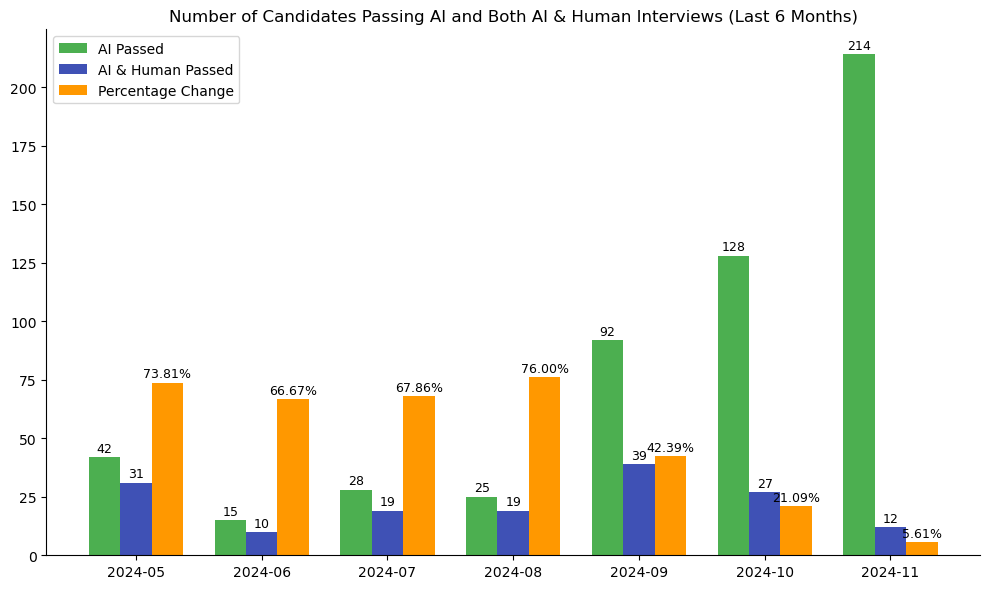

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Parse the "AI Interview completed date" column to datetime with the correct format
df1['AI Interview completed date'] = pd.to_datetime(df1['AI Interview completed date'], format='%d/%m/%y %H:%M')

# Filter to include only those who passed the AI Interview
ai_passed = df1[df1['Global Pass'] == True]

# Extract month and year from the "AI Interview completed date"
ai_passed['Month'] = ai_passed['AI Interview completed date'].dt.to_period('M')

# Convert 'Month' to datetime and subtract 6 months to get the last 6 months
ai_passed['Month_datetime'] = ai_passed['AI Interview completed date'].dt.to_period('M').dt.to_timestamp()
last_6_months = ai_passed['Month_datetime'].max() - pd.DateOffset(months=6)

# Filter data to include only the last 6 months
ai_passed_last_6_months = ai_passed[ai_passed['Month_datetime'] >= last_6_months]

# Calculate the number of candidates who passed the AI Interview for each of the last 6 months
monthly_ai_pass_count = ai_passed_last_6_months.groupby('Month').size()

# Calculate the number of candidates who passed both the AI and Human Interviews for each month
monthly_ai_and_human_pass_count = ai_passed_last_6_months[ai_passed_last_6_months['Human Interview passed'] == True].groupby('Month').size()

# Calculate the percentage change for AI & Human Passed to AI Passed
percentage_change = (monthly_ai_and_human_pass_count / monthly_ai_pass_count) * 100

# Display the monthly pass counts
print("Monthly Pass Counts (Number of Candidates):")
for month in monthly_ai_pass_count.index:
    ai_pass_count = monthly_ai_pass_count[month]
    ai_and_human_pass_count = monthly_ai_and_human_pass_count.get(month, 0)
    change_percent = percentage_change.get(month, 0)
    print(f"{month}: AI Passed = {ai_pass_count}, AI & Human Passed = {ai_and_human_pass_count}, Percentage Change = {change_percent:.2f}%")

# Plot the results to compare across the months
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart width
bar_width = 0.25  # Width of the bars
x = range(len(monthly_ai_pass_count))  # X positions for the bars

# Plot bars for AI Passed, and AI & Human Passed
bars1 = ax.bar(x, monthly_ai_pass_count.values, bar_width, label='AI Passed', color='#4CAF50')
bars2 = ax.bar([p + bar_width for p in x], monthly_ai_and_human_pass_count.values, bar_width, label='AI & Human Passed', color='#3F51B5')

# Plot the percentage change as a third bar
bars3 = ax.bar([p + bar_width*2 for p in x], percentage_change.values, bar_width, label='Percentage Change', color='#FF9800')

# Annotate each bar with the value (number of records or percentage)
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=9)

for bar in bars3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=9)

# Add title and labels
ax.set_title("Number of Candidates Passing AI and Both AI & Human Interviews (Last 6 Months)")
# ax.set_xlabel("Month")
# ax.set_ylabel("Number of Candidates / Percentage Change")

# Set x-axis labels
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(monthly_ai_pass_count.index.astype(str))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.show()


            Category  Men Passed  Women Passed
0          AI Passed         767           185
1       Human Passed        1077           192
2  AI & Human Passed         416            85


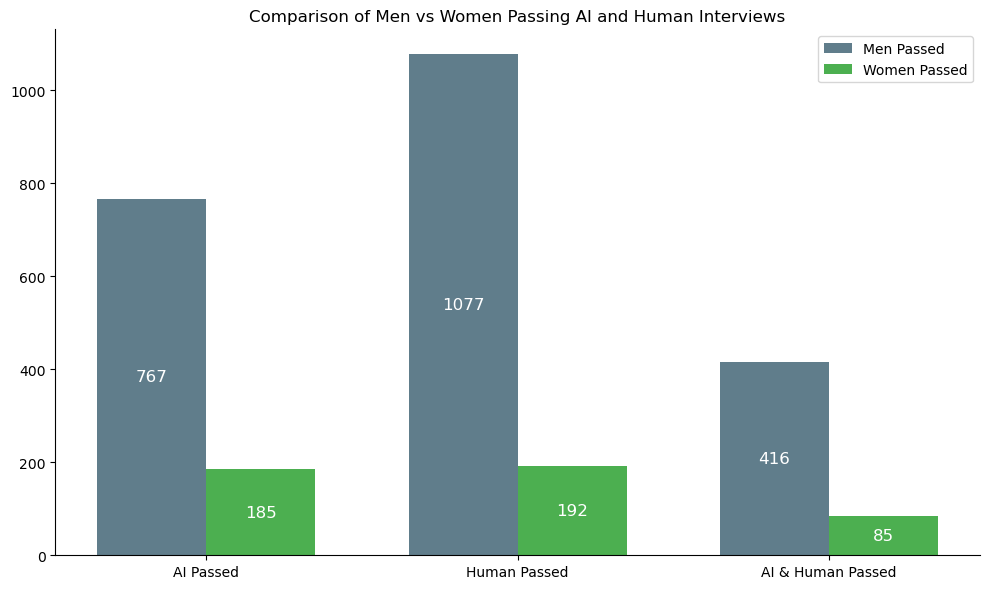

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# AI Interview Passed
men_ai_passed = df1[(df1["Global Pass"] == True) & (df1["Gender"].str.lower() == "male")]
women_ai_passed = df1[(df1["Global Pass"] == True) & (df1["Gender"].str.lower() == "female")]

# Human Interview Passed
men_human_passed = df1[(df1["Human Interview passed"] == True) & (df1["Gender"].str.lower() == "male")]
women_human_passed = df1[(df1["Human Interview passed"] == True) & (df1["Gender"].str.lower() == "female")]

# AI + Human Interview Passed
men_ai_and_human_passed = df1[(df1["Global Pass"] == True) & (df1["Human Interview passed"] == True) & (df1["Gender"].str.lower() == "male")]
women_ai_and_human_passed = df1[(df1["Global Pass"] == True) & (df1["Human Interview passed"] == True) & (df1["Gender"].str.lower() == "female")]

# Calculate the number of men and women who passed in each category
categories = ["AI Passed", "Human Passed", "AI & Human Passed"]

men_counts = [
    men_ai_passed.shape[0],  # Number of men who passed AI
    men_human_passed.shape[0],  # Number of men who passed Human
    men_ai_and_human_passed.shape[0],  # Number of men who passed both AI and Human
]

women_counts = [
    women_ai_passed.shape[0],  # Number of women who passed AI
    women_human_passed.shape[0],  # Number of women who passed Human
    women_ai_and_human_passed.shape[0],  # Number of women who passed both AI and Human
]

# Create a DataFrame for better visualization
comparison_df = pd.DataFrame({
    "Category": categories,
    "Men Passed": men_counts,
    "Women Passed": women_counts
})

# Print the comparison data
print(comparison_df)

# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart width
bar_width = 0.35  # Width of the bars
x = range(len(categories))  # X positions for the bars

# Plot bars for Men Passed and Women Passed with original colors
bars_men = ax.bar(x, men_counts, bar_width, label='Men Passed', color='#607D8B')
bars_women = ax.bar([p + bar_width for p in x], women_counts, bar_width, label='Women Passed', color='#4CAF50')

# Annotate each bar with the value (number of records) inside the bars
for bar in bars_men:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=12)

for bar in bars_women:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=12)

# Add title and labels
ax.set_title("Comparison of Men vs Women Passing AI and Human Interviews")
# ax.set_xlabel("Interview Categories")
# ax.set_ylabel("Number of Candidates Passed")

# Set x-axis labels
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(categories)

# Remove top and right borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.show()


In [64]:
total_length = len(df1)
true_count = df1[df1["Human Interview passed"] == True].shape[0]
false_count = df1[df1["Human Interview passed"] == False].shape[0]
null_count = df1["Human Interview passed"].isnull().sum()
print(f"Total Count : {total_length}")
print(f"Trues Count : {true_count}")
print(f"Falses Count : {false_count}")
print(f"Nulls Count : {null_count}")

Total Count : 5105
Trues Count : 1327
Falses Count : 44
Nulls Count : 3734


Monthly Pass Counts (Number of Candidates):
2024-05: AI Passed = 42, AI & Human Passed = 31, Percentage Change = 73.81%
2024-06: AI Passed = 15, AI & Human Passed = 10, Percentage Change = 66.67%
2024-07: AI Passed = 28, AI & Human Passed = 19, Percentage Change = 67.86%
2024-08: AI Passed = 25, AI & Human Passed = 19, Percentage Change = 76.00%
2024-09: AI Passed = 92, AI & Human Passed = 39, Percentage Change = 42.39%
2024-10: AI Passed = 128, AI & Human Passed = 27, Percentage Change = 21.09%
2024-11: AI Passed = 214, AI & Human Passed = 12, Percentage Change = 5.61%


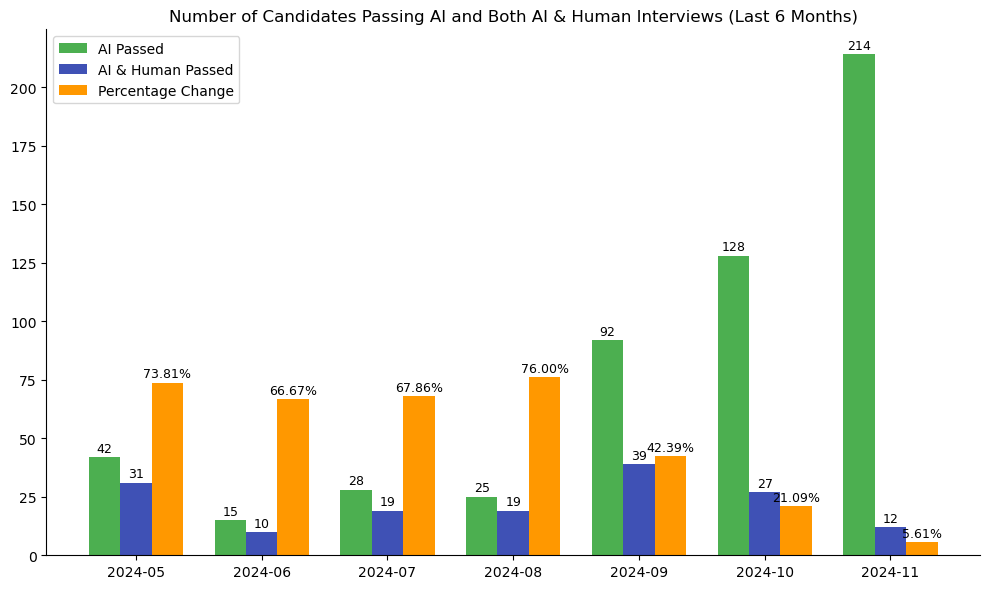

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Parse the "AI Interview completed date" column to datetime with the correct format
df1['AI Interview completed date'] = pd.to_datetime(df1['AI Interview completed date'], format='%d/%m/%y %H:%M')

# Filter to include only those who passed the AI Interview
ai_passed = df1[df1['Global Pass'] == True]

# Extract month and year from the "AI Interview completed date"
ai_passed['Month'] = ai_passed['AI Interview completed date'].dt.to_period('M')

# Convert 'Month' to datetime and subtract 6 months to get the last 6 months
ai_passed['Month_datetime'] = ai_passed['AI Interview completed date'].dt.to_period('M').dt.to_timestamp()
last_6_months = ai_passed['Month_datetime'].max() - pd.DateOffset(months=6)

# Filter data to include only the last 6 months
ai_passed_last_6_months = ai_passed[ai_passed['Month_datetime'] >= last_6_months]

monthly_ai_and_human_pass_count = ai_passed_last_6_months[ai_passed_last_6_months['Human Interview passed'].notnull() & ai_passed_last_6_months['Human Interview passed'] == True].groupby('Month').size()

# Calculate the number of candidates who passed the AI Interview only (no human interview or passed)
monthly_ai_pass_count = ai_passed_last_6_months.groupby('Month').size()

# Calculate the percentage change for AI & Human Passed to AI Passed
percentage_change = (monthly_ai_and_human_pass_count / monthly_ai_pass_count) * 100

# Display the monthly pass counts
print("Monthly Pass Counts (Number of Candidates):")
for month in monthly_ai_pass_count.index:
    ai_pass_count = monthly_ai_pass_count[month]
    ai_and_human_pass_count = monthly_ai_and_human_pass_count.get(month, 0)
    change_percent = percentage_change.get(month, 0)
    print(f"{month}: AI Passed = {ai_pass_count}, AI & Human Passed = {ai_and_human_pass_count}, Percentage Change = {change_percent:.2f}%")

# Plot the results to compare across the months
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart width
bar_width = 0.25  # Width of the bars
x = range(len(monthly_ai_pass_count))  # X positions for the bars

# Plot bars for AI Passed, and AI & Human Passed
bars1 = ax.bar(x, monthly_ai_pass_count.values, bar_width, label='AI Passed', color='#4CAF50')
bars2 = ax.bar([p + bar_width for p in x], monthly_ai_and_human_pass_count.values, bar_width, label='AI & Human Passed', color='#3F51B5')

# Plot the percentage change as a third bar
bars3 = ax.bar([p + bar_width*2 for p in x], percentage_change.values, bar_width, label='Percentage Change', color='#FF9800')

# Annotate each bar with the value (number of records or percentage)
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=9)

for bar in bars3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=9)

# Add title and labels
ax.set_title("Number of Candidates Passing AI and Both AI & Human Interviews (Last 6 Months)")
# ax.set_xlabel("Month")
# ax.set_ylabel("Number of Candidates / Percentage Change")

# Set x-axis labels
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(monthly_ai_pass_count.index.astype(str))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.show()


Monthly Pass Counts (Number of Candidates):
2024-05: AI Passed = 42, AI & Human Passed = 41, Percentage Change = 97.62%
2024-06: AI Passed = 15, AI & Human Passed = 15, Percentage Change = 100.00%
2024-07: AI Passed = 28, AI & Human Passed = 24, Percentage Change = 85.71%
2024-08: AI Passed = 25, AI & Human Passed = 25, Percentage Change = 100.00%
2024-09: AI Passed = 92, AI & Human Passed = 91, Percentage Change = 98.91%
2024-10: AI Passed = 128, AI & Human Passed = 125, Percentage Change = 97.66%
2024-11: AI Passed = 214, AI & Human Passed = 209, Percentage Change = 97.66%


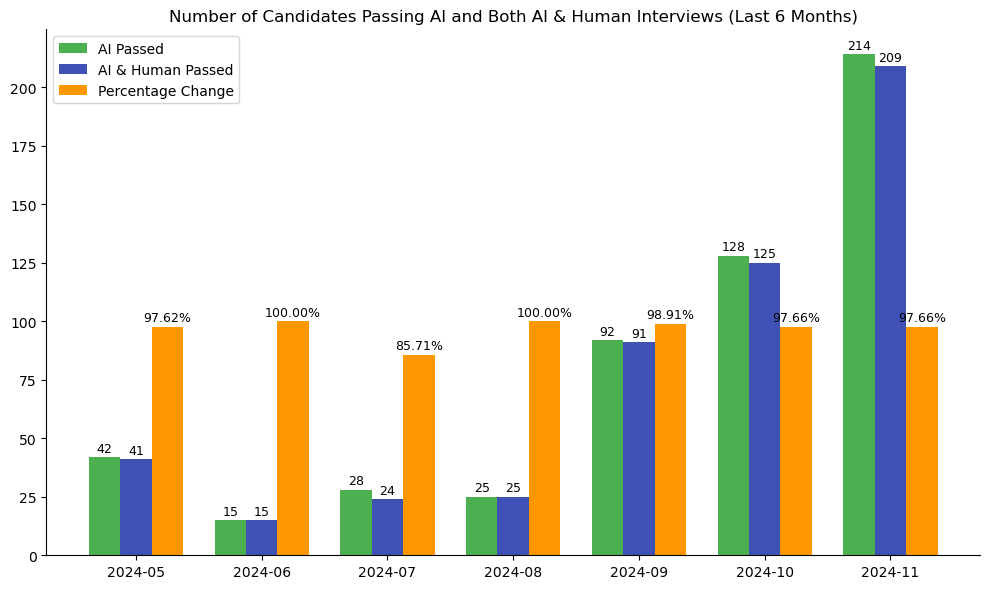

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Parse the "AI Interview completed date" column to datetime with the correct format
df1['AI Interview completed date'] = pd.to_datetime(df1['AI Interview completed date'], format='%d/%m/%y %H:%M')

# Filter to include only those who passed the AI Interview
ai_passed = df1[df1['Global Pass'] == True]

# Extract month and year from the "AI Interview completed date"
ai_passed['Month'] = ai_passed['AI Interview completed date'].dt.to_period('M')

# Convert 'Month' to datetime and subtract 6 months to get the last 6 months
ai_passed['Month_datetime'] = ai_passed['AI Interview completed date'].dt.to_period('M').dt.to_timestamp()
last_6_months = ai_passed['Month_datetime'].max() - pd.DateOffset(months=6)

# Filter data to include only the last 6 months
ai_passed_last_6_months = ai_passed[ai_passed['Month_datetime'] >= last_6_months]

monthly_ai_and_human_pass_count = ai_passed_last_6_months[
    ai_passed_last_6_months['Human Interview passed'].fillna(True) == True
].groupby('Month').size()

# Calculate the number of candidates who passed the AI Interview only (no human interview or passed)
monthly_ai_pass_count = ai_passed_last_6_months.groupby('Month').size()

# Calculate the percentage change for AI & Human Passed to AI Passed
percentage_change = (monthly_ai_and_human_pass_count / monthly_ai_pass_count) * 100

# Display the monthly pass counts
print("Monthly Pass Counts (Number of Candidates):")
for month in monthly_ai_pass_count.index:
    ai_pass_count = monthly_ai_pass_count[month]
    ai_and_human_pass_count = monthly_ai_and_human_pass_count.get(month, 0)
    change_percent = percentage_change.get(month, 0)
    print(f"{month}: AI Passed = {ai_pass_count}, AI & Human Passed = {ai_and_human_pass_count}, Percentage Change = {change_percent:.2f}%")

# Plot the results to compare across the months
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart width
bar_width = 0.25  # Width of the bars
x = range(len(monthly_ai_pass_count))  # X positions for the bars

# Plot bars for AI Passed, and AI & Human Passed
bars1 = ax.bar(x, monthly_ai_pass_count.values, bar_width, label='AI Passed', color='#4CAF50')
bars2 = ax.bar([p + bar_width for p in x], monthly_ai_and_human_pass_count.values, bar_width, label='AI & Human Passed', color='#3F51B5')

# Plot the percentage change as a third bar
bars3 = ax.bar([p + bar_width*2 for p in x], percentage_change.values, bar_width, label='Percentage Change', color='#FF9800')

# Annotate each bar with the value (number of records or percentage)
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=9)

for bar in bars3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=9)

# Add title and labels
ax.set_title("Number of Candidates Passing AI and Both AI & Human Interviews (Last 6 Months)")
# ax.set_xlabel("Month")
# ax.set_ylabel("Number of Candidates / Percentage Change")

# Set x-axis labels
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(monthly_ai_pass_count.index.astype(str))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.show()


Monthly Pass Counts (Number of Candidates):
2024-05: AI Passed = 32, AI & Human Passed = 31, Percentage Change = 96.88%
2024-06: AI Passed = 10, AI & Human Passed = 10, Percentage Change = 100.00%
2024-07: AI Passed = 23, AI & Human Passed = 19, Percentage Change = 82.61%
2024-08: AI Passed = 19, AI & Human Passed = 19, Percentage Change = 100.00%
2024-09: AI Passed = 40, AI & Human Passed = 39, Percentage Change = 97.50%
2024-10: AI Passed = 30, AI & Human Passed = 27, Percentage Change = 90.00%
2024-11: AI Passed = 17, AI & Human Passed = 12, Percentage Change = 70.59%


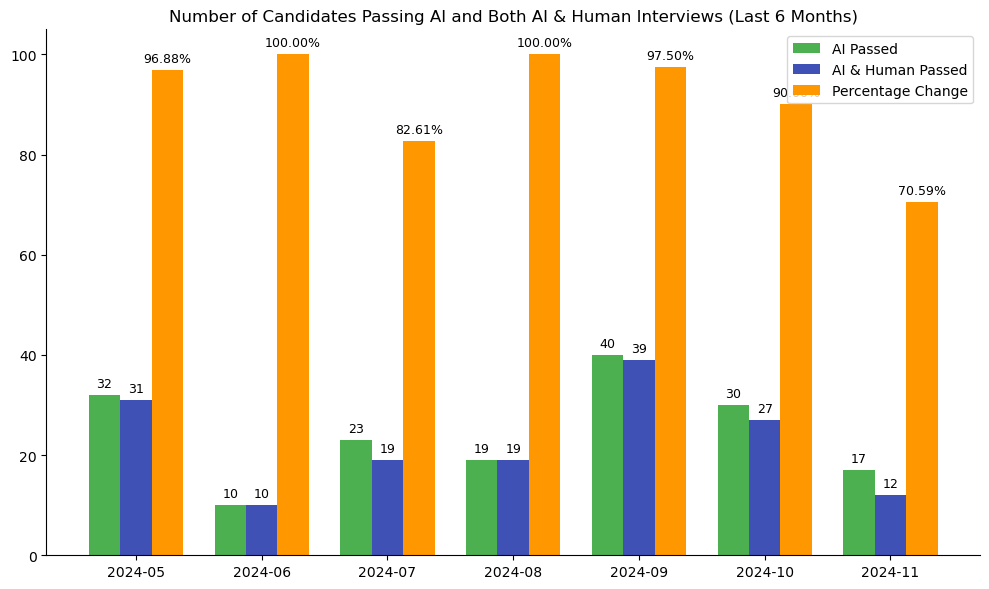

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Parse the "AI Interview completed date" column to datetime with the correct format
df1['AI Interview completed date'] = pd.to_datetime(df1['AI Interview completed date'], format='%d/%m/%y %H:%M')

# Filter to include only those who passed the AI Interview
ai_passed = df1[df1['Global Pass'] == True]

# Extract month and year from the "AI Interview completed date"
ai_passed['Month'] = ai_passed['AI Interview completed date'].dt.to_period('M')

# Convert 'Month' to datetime and subtract 6 months to get the last 6 months
ai_passed['Month_datetime'] = ai_passed['AI Interview completed date'].dt.to_period('M').dt.to_timestamp()
last_6_months = ai_passed['Month_datetime'].max() - pd.DateOffset(months=6)

# Filter data to include only the last 6 months
ai_passed_last_6_months = ai_passed[
    (ai_passed['Month_datetime'] >= last_6_months) &  # Last 6 months filter
    (ai_passed['Human Interview passed'].notnull())  # Exclude records where Human Interview passed is NULL
]
# Calculate the number of candidates who passed the AI Interview for each of the last 6 months
monthly_ai_pass_count = ai_passed_last_6_months.groupby('Month').size()

# Calculate the number of candidates who passed both the AI and Human Interviews for each month
monthly_ai_and_human_pass_count = ai_passed_last_6_months[ai_passed_last_6_months['Human Interview passed'] == True].groupby('Month').size()

# Calculate the percentage change for AI & Human Passed to AI Passed
percentage_change = (monthly_ai_and_human_pass_count / monthly_ai_pass_count) * 100

# Display the monthly pass counts
print("Monthly Pass Counts (Number of Candidates):")
for month in monthly_ai_pass_count.index:
    ai_pass_count = monthly_ai_pass_count[month]
    ai_and_human_pass_count = monthly_ai_and_human_pass_count.get(month, 0)
    change_percent = percentage_change.get(month, 0)
    print(f"{month}: AI Passed = {ai_pass_count}, AI & Human Passed = {ai_and_human_pass_count}, Percentage Change = {change_percent:.2f}%")

# Plot the results to compare across the months
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart width
bar_width = 0.25  # Width of the bars
x = range(len(monthly_ai_pass_count))  # X positions for the bars

# Plot bars for AI Passed, and AI & Human Passed
bars1 = ax.bar(x, monthly_ai_pass_count.values, bar_width, label='AI Passed', color='#4CAF50')
bars2 = ax.bar([p + bar_width for p in x], monthly_ai_and_human_pass_count.values, bar_width, label='AI & Human Passed', color='#3F51B5')

# Plot the percentage change as a third bar
bars3 = ax.bar([p + bar_width*2 for p in x], percentage_change.values, bar_width, label='Percentage Change', color='#FF9800')

# Annotate each bar with the value (number of records or percentage)
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=9)

for bar in bars3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=9)

# Add title and labels
ax.set_title("Number of Candidates Passing AI and Both AI & Human Interviews (Last 6 Months)")
# ax.set_xlabel("Month")
# ax.set_ylabel("Number of Candidates / Percentage Change")

# Set x-axis labels
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(monthly_ai_pass_count.index.astype(str))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.show()
